# Dog vs Cat Classification - Transfer Learning

## Download Dataset
In this tutorial, you will use a dataset containing several thousand images of cats and dogs. Download and extract a zip file containing the images, then create a `tf.data.Dataset` for training and validation using the `tf.keras.utils.image_dataset_from_directory` utility. You can learn more about loading images in this [tutorial](https://www.tensorflow.org/tutorials/load_data/images).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


import warnings
warnings.filterwarnings("ignore")

#### "I'm downloading a dataset of cat and dog images, unzipping it, and loading the pictures into TensorFlow. Each picture is resized to 160x160, and they're loaded in groups of 32 images. TensorFlow also figures out the labels based on the folder name — whether it's a cat or a dog."

In [ ]:
# URL to download the dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# this will download the file and extract it to the default directory but we use extract=False
# we will extract manually, if extract=True, it will extract the file to the default directory
# then no need to extract manually
# just for learning purpose

path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

# “Hey, _URL is a helper variable, not something critical or public.”
# You can use whatever name you want for it. like 
# _DATASET_URL or DATASET_URL or url or URL

print("Downloaded file path:", path_to_zip)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 36s 1us/step
Downloaded file path: C:\Users\MUSAB\.keras\datasets\cats_and_dogs_filtered.zip


In [ ]:
# now hare we will extract the file manually
# As we have set extract=False, so we need to extract the file manually
# just for learning purpose
# Be Happy, make learning fun


# import library for extracting
import zipfile

# giving path to the zip file
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    # zip_ref just a variable name, you can use whatever name you want
    
    zip_ref.extractall(os.path.dirname(path_to_zip))

In [ ]:
# this step is optional, only for learning purpose "Happy learning"
# now we will check the extracted file and its contents
extracted_path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print("Extracted to:", extracted_path)
print("Contents:", os.listdir(extracted_path))

Extracted to: C:\Users\MUSAB\.keras\datasets\cats_and_dogs_filtered
Contents: ['train', 'validation', 'vectorize.py']


In [11]:
# Define paths
train_dir = os.path.join(extracted_path, 'train')
validation_dir = os.path.join(extracted_path, 'validation')

### `path_to_zip` contains the full path of the downloaded zip file
#### Example: C:/Users/MUSAB/.keras/datasets/cats_and_dogs_filtered.zip

### We use `os.path.dirname(path_to_zip)` to get the folder where the zip file was saved
### Then we add 'cats_and_dogs_filtered' to reach the extracted folder
### This folder contains two subfolders: 'train' and 'validation'

#### Full final structure looks like this:
#### └── cats_and_dogs_filtered
####     ├── train
####     │   ├── cats
####     │   └── dogs
####     └── validation
####        ├── cats
####        └── dogs

#### `PATH` points to the main folder (cats_and_dogs_filtered)
#### `train_dir` points to the training data folder
#### `validation_dir` points to the validation data folder


In [ ]:
# just to check the contents of the train and validation directories
# this function telling number of files in each directory
def count_images(folder_path):
    total = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                total += 1
    return total

# Example:
total_images = count_images(extracted_path)
print("Total images in the dataset:", total_images)

Total images in the dataset: 3000


In [32]:
train_images = count_images(train_dir)

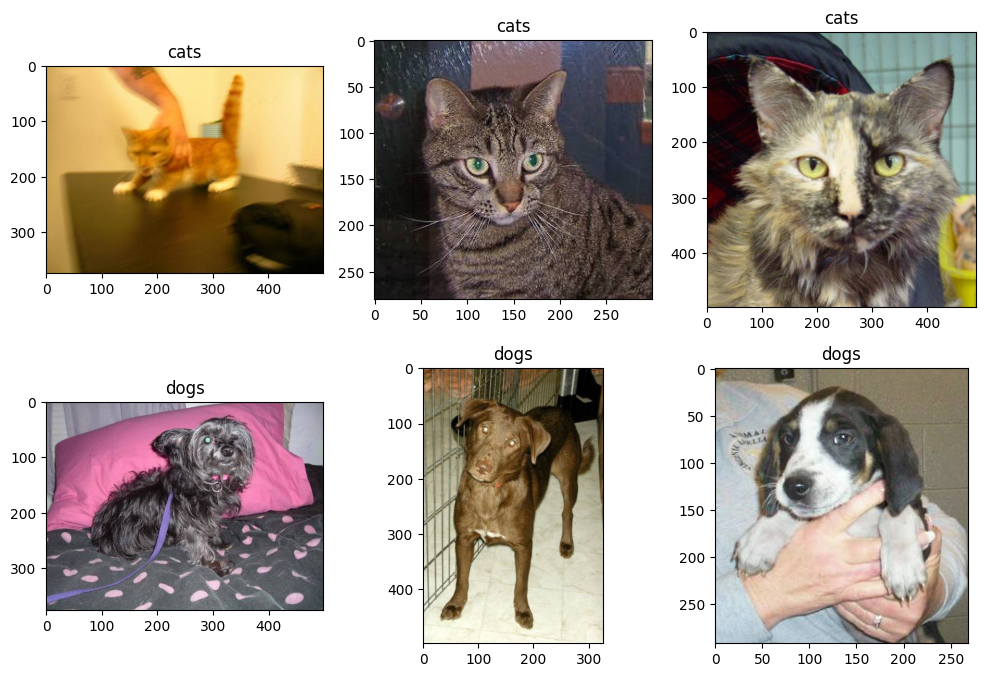

In [ ]:
categories = ['cats', 'dogs']
plt.figure(figsize=(10, 10))

i = 0
for label in categories:
    folder_path = os.path.join(train_dir, label)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    for j in range(3):  # Show 3 images per class
        img_path = os.path.join(folder_path, image_files[j])
        img = Image.open(img_path)
        
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(label)        
        i += 1

plt.tight_layout()
plt.show()

### As we see **`02_Processing image data for Deep Learning.ipynb:`**
* Load the image
* Resize the image
* normalize the image
* convert to grayscale
* train the model

#### we load the images and we can see that there is a lot of variation in the images like axis some images have more pixels than others

#### so we need to preprocess the images to make them uniform

### Preprocessing the images

In [ ]:
# define the batch size and image size
# BATCH_SIZE just to telling model how many images to process at a time
# IMG_SIZE just to telling model what size of image to process

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# here just separating the images into training and validation
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                  shuffle=True,
                                                                  batch_size=BATCH_SIZE,
                                                                  image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


### train_dataset have a total of 2,000 images, and validation_dataset have 1000 images

### Let's confirm that

In [21]:
total_training_images = 0
for images, labels in train_dataset:
    total_training_images += images.shape[0]

print("Total training images:", total_training_images)

total_validation_images = 0
for images, labels in validation_dataset:
    total_validation_images += images.shape[0]

print("Total validation images:", total_validation_images)



Total training images: 2000
Total validation images: 1000


In [ ]:
# file_names = os.listdir(train_dir)
# for i in range(5):
#     name = file_names[i]
#     print(name)


categories = ['cats', 'dogs']

for category in categories:
    print(f"Images from '{category}' folder:")
    folder_path = os.path.join(train_dir, category)
    image_files = os.listdir(folder_path)
    
    for i in range(5):
        name = image_files[i]
        print(name[0:3]) # just to check the first 3 characters of the file name


Images from 'cats' folder:
cat
cat
cat
cat
cat
Images from 'dogs' folder:
dog
dog
dog
dog
dog


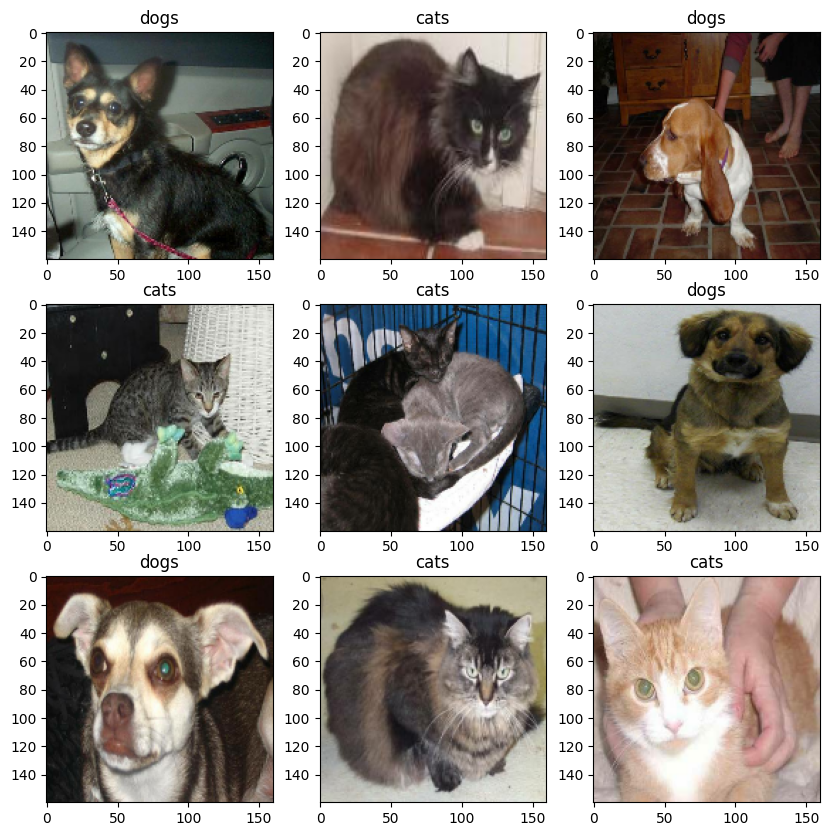

In [44]:
class_names = train_dataset.class_names  # this gives you ['cats', 'dogs']

# Create a figure
plt.figure(figsize=(10, 10))

# Take one batch from the dataset
for images, labels in train_dataset.take(1): # take(1) means take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image
        plt.title(class_names[labels[i]])  # Show class label (cat or dog)
        # plt.axis("off")  # Hide axis


### Here we can see that the images are uniform(same size).